In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, explained_variance_score

plt.style.use('dark_background')

%matplotlib inline

In [3]:
df = pd.read_csv('./data/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

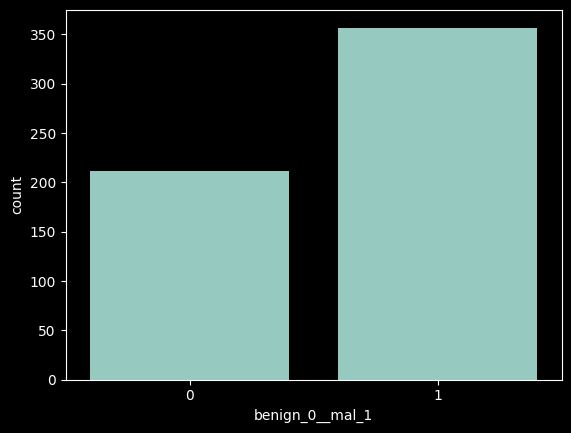

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

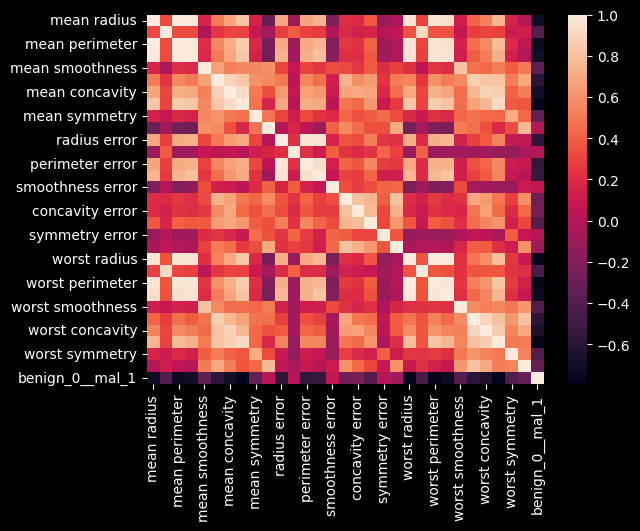

In [7]:
sns.heatmap(df.corr())

In [8]:
X = df.drop('benign_0__mal_1',axis=1).values
Y = df['benign_0__mal_1'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [9]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
x_train.shape

(426, 30)

In [11]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

2024-05-13 16:22:05.376732: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-13 16:22:05.377474: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
model.fit(x=x_train, y=y_train, epochs=100, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6885 - val_loss: 0.6726
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6599 - val_loss: 0.6428
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6318 - val_loss: 0.6057
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5837 - val_loss: 0.5517
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5299 - val_loss: 0.4931
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4660 - val_loss: 0.4316
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4156 - val_loss: 0.3761
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3634 - val_loss: 0.3265
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3231 - val_loss: 0.2879
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2873 - val_loss: 0.2526
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2593 - val_loss: 0.2294
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

<Axes: >

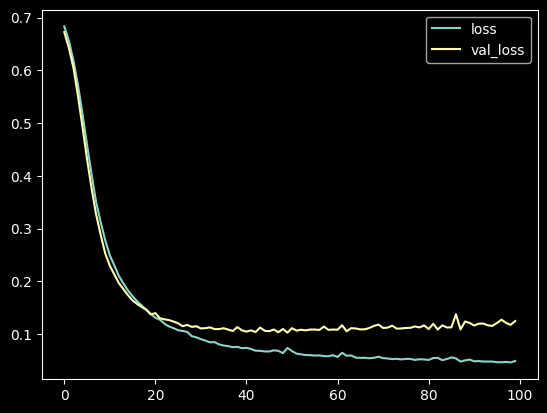

In [13]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [16]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=x_train, y=y_train, epochs=100, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7110 - val_loss: 0.6524
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6565 - val_loss: 0.6260
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6228 - val_loss: 0.5971
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6012 - val_loss: 0.5583
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5465 - val_loss: 0.5174
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5102 - val_loss: 0.4742
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4654 - val_loss: 0.4314
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4277 - val_loss: 0.3889
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3791 - val_loss: 0.3479
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3509 - val_loss: 0.3127
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3060 - val_loss: 0.2827
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2

<Axes: >

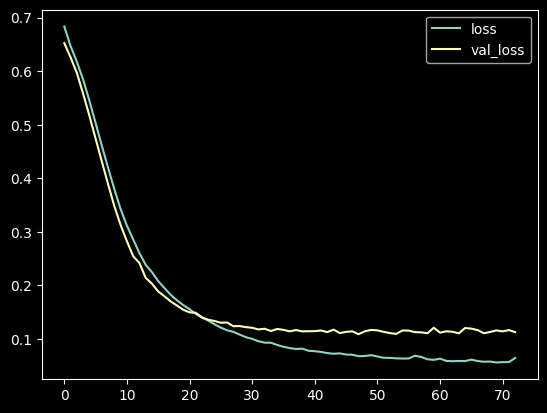

In [17]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [20]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=x_train, y=y_train, epochs=200, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7179 - val_loss: 0.6951
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6864 - val_loss: 0.6855
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6801 - val_loss: 0.6724
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6549 - val_loss: 0.6594
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6430 - val_loss: 0.6488
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6542 - val_loss: 0.6266
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6204 - val_loss: 0.5922
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5903 - val_loss: 0.5495
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5714 - val_loss: 0.5135
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5359 - val_loss: 0.4696
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5030 - val_loss: 0.4367
Epoch 12/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

<Axes: >

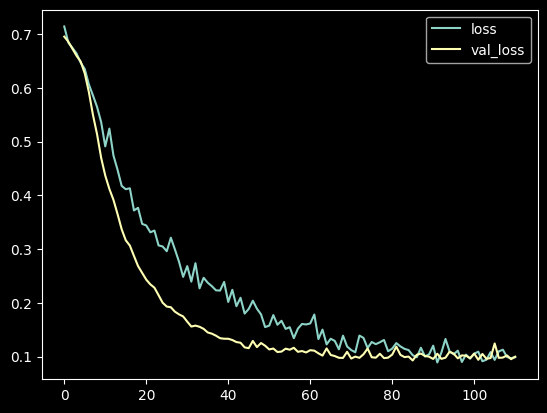

In [21]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [27]:
predictions = (model.predict(x_test)>0.5).astype("int32")

print(f"Classification Report:\n {classification_report(y_test,predictions)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,predictions)}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Confusion Matrix:
 [[54  1]
 [ 2 86]]
